In [1]:
import pandas as pd
from pathlib import Path
import kagglehub
from sklearn.model_selection import train_test_split # For spliting the data
from sklearn.preprocessing import StandardScaler # For feature‑scaling
from sklearn.linear_model import LogisticRegression # LR model we will use
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report # Accuracy, classification report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# # Download latest version
# path = kagglehub.dataset_download("zeeshier/weather-forecast-dataset")

# print("Path to dataset files:", path)
# df = pd.read_csv(next(Path(path).glob("*.csv")))

Path to dataset files: /kaggle/input/weather-forecast-dataset


In [89]:
df.to_csv('weather-forecast.csv')

In [3]:
# List first 5 Rows using df.head()

df.head(10)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain
5,26.147353,48.217260,15.258547,59.766279,1049.738751,no rain
6,20.939680,40.799444,2.232566,45.827508,1014.173766,no rain
7,32.294325,51.848471,2.873621,92.551497,1006.041733,no rain
8,34.091569,48.057114,5.570206,82.524873,993.732047,no rain
9,19.586038,82.978293,5.760537,98.014450,1036.503457,rain


In [4]:
# Show your dataset Shape
df.shape

(2500, 6)

In [5]:
# Show your dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [6]:
# Show your dataset describe
df.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


# **3.Clean your data**

**3‑a) Check duplicates**

In [7]:
print("Duplicates before:", df.duplicated().sum())
# TODO Drop Duplicates Here
print("Duplicates after:", df.duplicated().sum())

Duplicates before: 0
Duplicates after: 0


**3‑b) Check missing values**

In [8]:
print("Missing values per column:", df.isnull().sum())
# TODO Checking null values

Missing values per column: Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64


**3‑c) Shape after cleaning**

In [9]:
print("Shape after cleaning:", df.shape) # Shape = (rows, columns)

Shape after cleaning: (2500, 6)


**3-d) Relation Between Features**

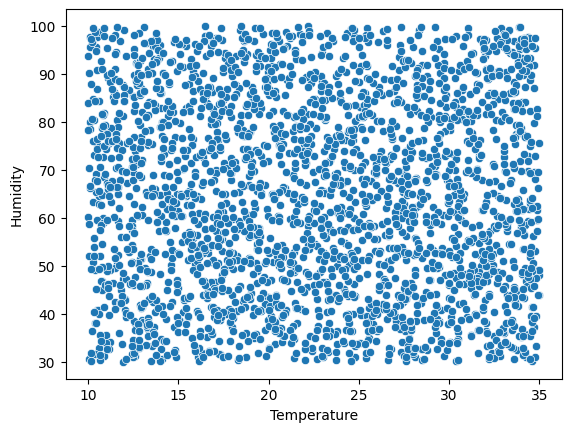

In [10]:
# Make plot and show relations
sns.scatterplot(data=df, x='Temperature', y='Humidity')
plt.show()

# **4.Split features & labels**

**4-a) String to int**

In [11]:
# Map 'rain' / 'no rain' to binary labels
df['Rain'] = df['Rain'].map({
    'rain': 1,      # TODO: choose the value for “rain”
    'no rain': 0    # TODO: choose the value for “no rain”
})
df.head(10)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,1
1,27.879734,46.489704,5.952484,4.990053,992.614190,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,1
4,20.591370,96.858822,4.643921,47.676444,980.825142,0
5,26.147353,48.217260,15.258547,59.766279,1049.738751,0
6,20.939680,40.799444,2.232566,45.827508,1014.173766,0
7,32.294325,51.848471,2.873621,92.551497,1006.041733,0
8,34.091569,48.057114,5.570206,82.524873,993.732047,0
9,19.586038,82.978293,5.760537,98.014450,1036.503457,1


**4-b) Select your Features and Target**

In [36]:
X = df[['Temperature', 'Humidity', 'Cloud_Cover']]    # all columns except the target
y = df['Rain']    # the target column

**4-c) Split your data**

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.20,           # % goes to invisible
    random_state = 42,         # repeatability
    stratify = y               # keep 0/1 ratio the same
)

In [84]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)    # learn scale + apply
X_test_scaled  = scaler.transform(X_test)        # apply the exact same scale

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (2000, 3)
X_test_scaled shape: (500, 3)


In [85]:
# How the model can read the DATA:
print(X_train_scaled)
print("-" * 70)
print(X_test_scaled)

[[ 0.03357336  0.31372769 -1.2733528 ]
 [ 1.61709876  1.28025217 -1.0538843 ]
 [-0.01971459 -1.4558401   1.37262105]
 ...
 [ 0.77176207  0.01970851  1.23024294]
 [-0.87341803 -1.6289281   1.61308554]
 [-0.12220106  0.89097113  0.27805229]]
----------------------------------------------------------------------
[[ 0.62778231  1.52733167  0.23014225]
 [-0.22818598  1.58829764  1.24388375]
 [ 0.19182243 -1.49042604  1.5697778 ]
 ...
 [ 0.27209485  0.47681394 -0.35014972]
 [-1.38286738 -0.3682612   1.62418197]
 [ 0.41748851  1.19824401 -1.61704873]]


In [86]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled , y_train)

LogisticRegression(random_state=42)

In [87]:
y_pred = model.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

print("\nDetailed report:")
print(classification_report(y_test, y_pred, target_names=['No Rain', 'Rain']))

Accuracy: 92.60%

Detailed report:
              precision    recall  f1-score   support

     No Rain       0.95      0.96      0.96       437
        Rain       0.72      0.68      0.70        63

    accuracy                           0.93       500
   macro avg       0.84      0.82      0.83       500
weighted avg       0.92      0.93      0.93       500



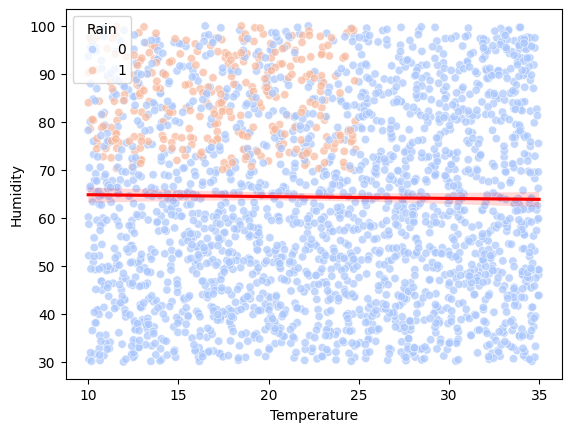

In [99]:
sns.scatterplot(x='Temperature', y='Humidity', data=df, hue='Rain', palette='coolwarm', alpha=0.7);
sns.regplot(x='Temperature', y='Humidity', data=df, color='red', scatter=False);

In [34]:
# Let the user input values
temp = float(input("Enter Temperature: "))
humidity = float(input("Enter Humidity: "))
#3wind_speed = float(input("Enter Wind Speed: "))
cloud_cover = float(input("Enter Cloud Cover: "))
#pressure = float(input("Enter Pressure: "))

# Create a new data point for prediction
new_data = pd.DataFrame(
    [[temp, humidity, cloud_cover]],
                        columns=['Temperature', 'Humidity', 'Cloud_Cover'])

# Scale the new data using the same scaler fitted on the training data
new_data_scaled = scaler.transform(new_data)

# Predict
prediction = model.predict(new_data_scaled)

# Output the result
if prediction[0] >= 0.5:
  print("It is likely to rain.")
else:
  print("It is not likely to rain.")

Enter Temperature: 37
Enter Humidity: 2
Enter Cloud Cover: 88
It is not likely to rain.


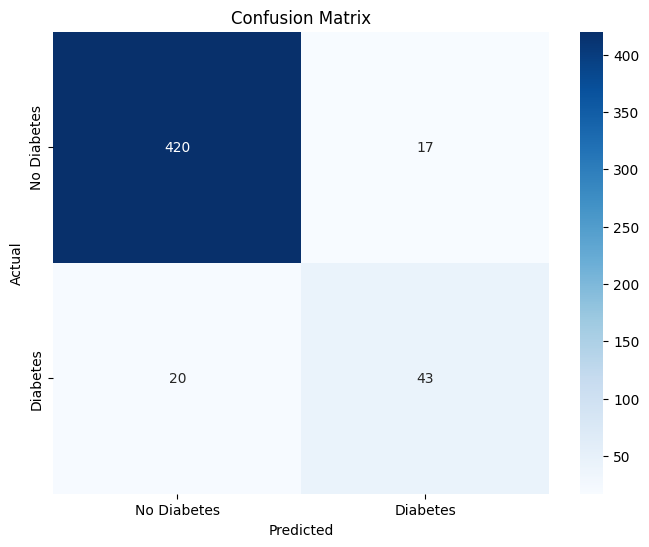

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# TP FP
# FN TN

#                           ( True Positives + True Negatives )
# Accuracy = ------------------------------------------------------------------------
#             ( False Positives + False Negatives + True Positives + True Negatives )
